In [41]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.express as px

init_notebook_mode (connected = True)
import warnings
warnings.filterwarnings('ignore')


In [2]:
f = pd.read_csv('titanic.csv')

In [3]:
f.isnull().sum(), f.duplicated().sum()

(Survived                   0
 Pclass                     0
 Name                       0
 Gender                     0
 Age                        0
 Siblings/Spouses Aboard    0
 Parents/Children Aboard    0
 Fare                       0
 dtype: int64,
 0)

## Question 1 Bar plot of Pclass in Percentage
 - In this section we have taken each Pclass value and find the occurence of that variable in the data, The results shows that the data has three classes and 3rd class has the most values in data The overall percentage is greater than combined percentage of the other two classes which meanns that more than 50% data has passenders with pclass 3. The lowest occured class is class 2 in the data set having the occurence of only 20% in the whole dataset. 

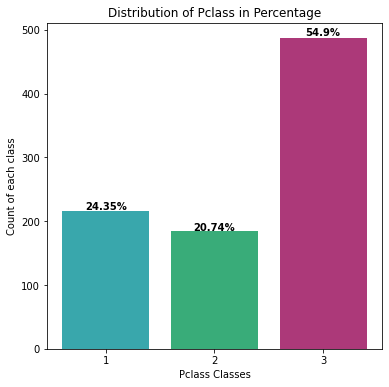

In [4]:
bar = f['Pclass'].value_counts().rename_axis('Subclass').reset_index(name = 'counts')
total = bar['counts'].sum()
percentage= []
for i in range(bar.shape[0]):
    pct = (bar.counts[i]/total)*100
    percentage.append(round(pct,2))
bar['Percentage'] = percentage


plt.figure(num = 1, figsize= (6,6))
c_list = ['#AC3979','#39A7AC','#39AC79']
graph = plt.bar(bar.Subclass, bar.counts, color = c_list)
plt.xlabel("Pclass Classes")
plt.ylabel('Count of each class')
plt.xticks([1, 2, 3])
       
plt.title("Distribution of Pclass in Percentage")

i = 0 
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2, y+height*1.01, str(bar.Percentage[i])+ '%', ha = 'center', weight = 'bold')
    i = i+1
plt.show()

## Qno 2 Started
### Part 1 

- In this section we have created a stacked graph for those plcasses who has survived for who have not survived. In the horizontal axis we have class Pclass 1 , 2 and 3 and the vertical axis we have count of the classes which survived and which did not survived. The data results shows that the Pclass 3 has the lowest survival rate while the occurence of the Pclass 3 is the most in the data. Out of almost more than 470 people only 119 people survived which is very. The class 1 has the highest level of survival rate if taking percentages. Out of 216 people 136 survived. This can be concluded that those who belong to class 1 have more chance to survived compare to other two classes. 

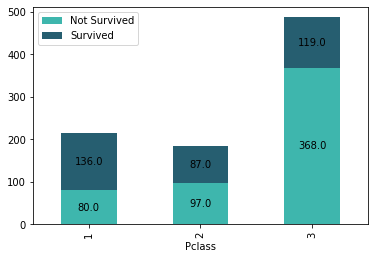

In [5]:
death_counts = pd.crosstab(f.Pclass, f.Survived.astype(bool))
ax = death_counts.plot(kind='bar', stacked=True, color=['#3EB6AD','#265E70'])
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = height
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    
ax.legend(["Not Survived", "Survived"])

### Part 2

- In this section have taken the  exact percentage of survival rate of the each class. The data shows that the Pclass 1 has the highest survival rate with the percentage of more than 60%. If calculating probabilities of survival rate with the given data. The results shows that the class 1 people has the highest probability rate of survival compared to others. The results also indicates that the class 2 has the survival rate near to 50% which can be interpereted as the people belonging to class 2 has the 50% chance to survive. 

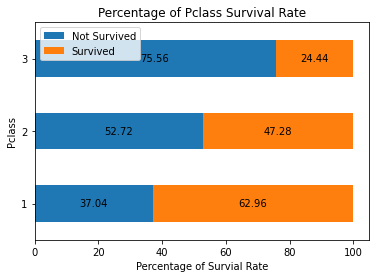

In [6]:
death_counts_11= pd.crosstab([f.Pclass], f.Survived.astype(bool))
death_counts_11_T = death_counts_11
death_counts_11_T1 = death_counts_11_T.div(death_counts_11_T.sum(axis= 1), axis = 0)*100




ax = death_counts_11_T1.plot(stacked=True, kind='barh')

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = round(width, 2)
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    


ax.legend(["Not Survived", "Survived"])
plt.ylabel('Pclass')
plt.xlabel('Percentage of Survial Rate')
plt.title('Percentage of Pclass Survival Rate')

plt.show()

### Part 3 
- In this section we have taken displot of people survived or not with respect to their class and the results are same as they were for rest of the graphs. 

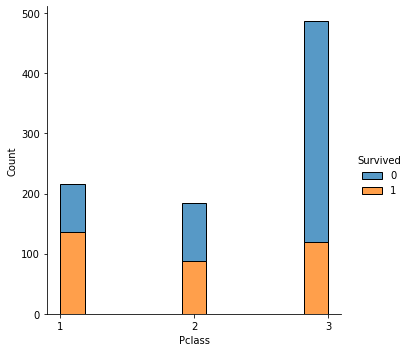

In [7]:
ax = sns.displot(data=f, x="Pclass", hue="Survived", multiple="stack")
plt.xticks([1,2,3])
plt.show()

### Part 4

- In this section we have checked the survival rate with respect to the gender. The results describes that the male has only 20% survival chances while the female has roughly 75% survival rate. The results indicates that women has more survival rates than men. The data shows that women are more likely to survive comparing to women

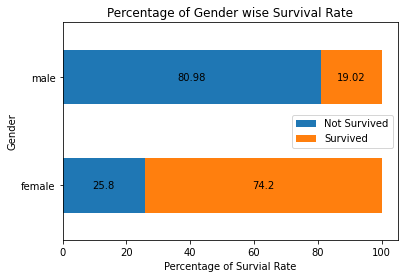

In [8]:
death_counts_12= pd.crosstab([f.Gender], f.Survived.astype(bool))
death_counts_12_T = death_counts_12
death_counts_12_T1 = death_counts_12_T.div(death_counts_12_T.sum(axis= 1), axis = 0)*100


ax = death_counts_12_T1.plot(stacked=True, kind='barh')

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    width = round(width,2) 
    label_text = width
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center')
    


ax.legend(["Not Survived", "Survived"])
plt.ylabel('Gender')
plt.xlabel('Percentage of Survial Rate')
plt.title('Percentage of Gender wise Survival Rate')

plt.show()

## Q no 3
- In this section we have created a count for survival rates for each age group considering the male and female. The results indicated that female with the age range of almost 20 to 50 has the highest survival rate. The data shows that women are more likely to survive, if their age is between 20-50. On the other hand when talking about men, It is very less likely for them survive considering all age groups. The survival rate for men is very low compared to women. In the male section, only 21-30 age group has a little survival rate which is considerable comparing to a very high survival rates of women. 

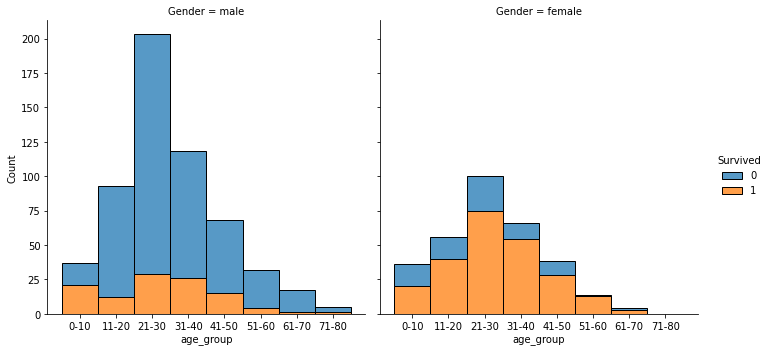

In [9]:
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
#use pandas cut to bin the continuous variable age
f['age_group'] = pd.cut(f.Age, range(0, 81, 10), labels=age_labels)

ax = sns.displot(data=f, x="age_group", hue="Survived", col = 'Gender', multiple="stack")

## Qno 4
- In this section have tried to find out the highest number of passenger class people. The data shows that the pclass 3 has the most occurence in the data set. 

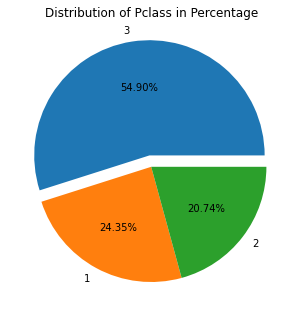

In [10]:
pie = f['Pclass'].value_counts().rename_axis('Subclass').reset_index(name = 'counts')
labels = pie.Subclass
values = pie.counts
explode = [0.1,0,0]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(values, labels = labels, autopct = '%1.2f%%', explode = explode)
plt.title("Distribution of Pclass in Percentage")
plt.show()

## Qno 5
### Part 1 
- The Frequency of Parents/Children Aboard by Parents/Children Aboard shows those passensers who had Parents/Children Aboard between 0 to 2 has more frequency as compared to others.

[Text(0, 0, '813'), Text(0, 0, '44'), Text(0, 0, '23'), Text(0, 0, '7')]

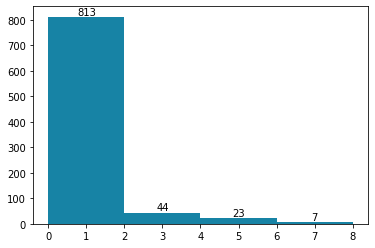

In [11]:
counts, edges, bars = plt.hist(f['Siblings/Spouses Aboard'], bins=4, color="#1783A5")
plt.bar_label(bars)


### Part 2 
- The tallest bar in Parents/Children aboard representing a bin between 0 to 2 shows 792 passengers, while 2nd bin between 2 to 4 shows 85 passengers and 3rd bin is between 4 to 6 shows 10 passengers.


[Text(0, 0, '792'), Text(0, 0, '85'), Text(0, 0, '10')]

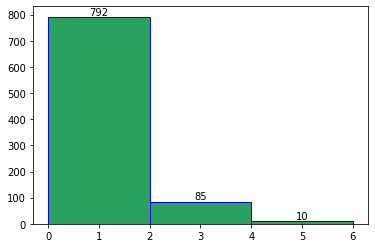

In [12]:
counts, edges, bars = plt.hist(f['Parents/Children Aboard'], bins=3, edgecolor="blue", color="#2AA25F")
plt.bar_label(bars)

## Qno 6 
- In this section we have created a box plot of the data in terms of their sibling or spouse aboard, We have checked the survival rate of each ss_group of sibling or spouse aboard. The data shows that if 1 or 2 sibling/spouse aboard, their is a high chance of survival rate. On the other hand if there are more 3 to 6 sibling spouse aboard and the age is between 15-25, there is a high chance of survival rate. The people whose 7 or 8 siblings are aboard have 0 chance of survival rates.

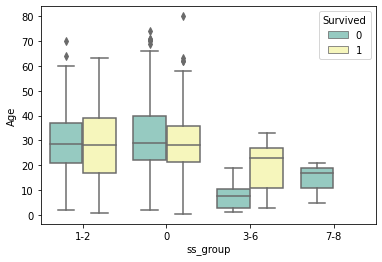

In [13]:
# create a list of our conditions
conditions = [
    (f['Siblings/Spouses Aboard'] == 0),
    (f['Siblings/Spouses Aboard'] > 0) & (f['Siblings/Spouses Aboard'] <=2),
    (f['Siblings/Spouses Aboard'] > 2) & (f['Siblings/Spouses Aboard'] <= 6),
    (f['Siblings/Spouses Aboard'] > 6)
    ]

# create a list of the values we want to assign for each condition
values = ['0', '1-2', '3-6','7-8']

# create a new column and use np.select to assign values to it using our lists as arguments
f['ss_group'] = np.select(conditions, values)
ax = sns.boxplot(x="ss_group", y="Age", hue="Survived",data=f, palette="Set3")

## Qno 7

- The scatter plot shows that the female with 0 1  and 2 sibling spouse abroad and mostly belonging to pclass 1 and 2 have most survival rates. The The results also indicates that male with 1 or 2 sibling spouse aboard have high survival rates. The lowest survival rate is when 3 to 8 siblings aboard and gender is male and most of the people belong pclass 3.The 100% non survival rate is when the gender is female and 7-8 siblings are aboard.

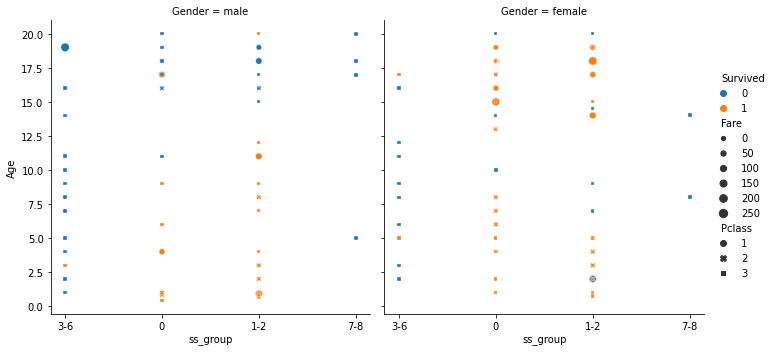

In [15]:
df1 = f.loc[f['Age'] <= 20]
sns.relplot(data=df1, x="ss_group", y="Age", hue="Survived", col="Gender", size = 'Fare', style= 'Pclass')

## Qno 8

<AxesSubplot:xlabel='Age', ylabel='Fare'>

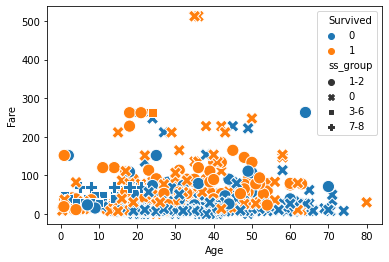

In [29]:
sns.scatterplot(x = 'Age', y = 'Fare', style = 'ss_group', hue = 'Survived', data = f, s = 150)

## Q no 9 
### Part 1

- The results shows that when the there are 0 or 1 sibling aboard and the age is less than 10, The survival rate is higher than 60%. The survival rate is 100 percent then the age is 21-30 or 51-60 and 3 parents of children are aboard. 

<AxesSubplot:xlabel='Parents/Children Aboard', ylabel='age_group'>

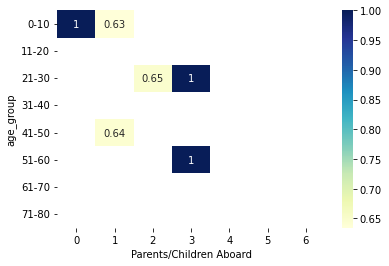

In [22]:
pivoted11 = f.pivot_table(index="age_group", columns="Parents/Children Aboard", values="Survived")
columns = [0, 1, 2, 3, 4, 5, 8]
pivoted12 = pivoted11.copy()
sns.heatmap(pivoted12, annot=True, mask=(pivoted12 < 0.6), cmap="YlGnBu")

### Part 2 

- The results shows that when the age is between 21-40 and 3 sibling or spouse aboard the survival rate is 100%. The survival rate is greater than 60% when the age is between 0-10 and 0, 1 and 2 sibling spouse aboard. 

<AxesSubplot:xlabel='Siblings/Spouses Aboard', ylabel='age_group'>

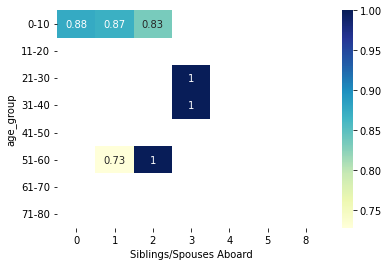

In [27]:
pivoted = f.pivot_table(index="age_group", columns="Siblings/Spouses Aboard", values="Survived")
columns = [0, 1, 2, 3, 4, 5, 8]
pivoted1 = pivoted.copy()
sns.heatmap(pivoted1, annot=True, mask=(pivoted1 < 0.6), cmap="YlGnBu")

## Q no 10

- In This section we have taken the people with age lower than 20 and check if their 0,1 or more parents or children are abroad then what is the gender wise survival rate. The results for 0 parents or children abroad and age lower than 20 shows that female has more chances to live. On the other hand when we see the case for 1 or more parents or children abroad, the data shows the same story that the women survived more. This shows that no matter how many parents or children are abroad, the highest ratio for survival rate will be of women given the age lower than 20. 

In [28]:
# create a list of our conditions
df11 = f.loc[f['Age'] <= 20]

conditions = [
    (df11['Parents/Children Aboard'] == 0),
    (df11['Parents/Children Aboard'] == 1),
    (df11['Parents/Children Aboard'] > 1)
    ]

# create a list of the values we want to assign for each condition
values = [0, 1, 2]

# create a new column and use np.select to assign values to it using our lists as arguments
df11['class'] = np.select(conditions, values)

fig = px.scatter_3d(df11,x = 'Parents/Children Aboard', y = 'Age', z= 'Gender',
                    color='Survived')
fig.show()
## IN this section we have created a 3D of no parents abroad and 1 and more than 1 sibling abroad. The data shows that if there are no parents abroad the women has more chance of
# survival. THE OTHER Thing is taht over all women has more chance of survival comparing to men. rather 0 ,1 orr more than 1 siblings aboard.

## The End 